In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mkpucit-ner-dataet/fold7/urduDataTrainfold7.txt
/kaggle/input/mkpucit-ner-dataet/fold7/urduDataTestfold7.txt
/kaggle/input/mkpucit-ner-dataet/fold1/urduDataTrainfold1.txt
/kaggle/input/mkpucit-ner-dataet/fold1/urduDataTestfold1.txt
/kaggle/input/mkpucit-ner-dataet/fold3/urduDataTestfold3.txt
/kaggle/input/mkpucit-ner-dataet/fold3/urduDataTrainfold3.txt
/kaggle/input/mkpucit-ner-dataet/fold5/urduDataTestfold5.txt
/kaggle/input/mkpucit-ner-dataet/fold5/urduDataTrainfold5.txt
/kaggle/input/mkpucit-ner-dataet/fold10/urduDataTestfold10.txt
/kaggle/input/mkpucit-ner-dataet/fold10/urduDataTrainfold10.txt
/kaggle/input/mkpucit-ner-dataet/fold9/urduDataTestfold9.txt
/kaggle/input/mkpucit-ner-dataet/fold9/urduDataTrainfold9.txt
/kaggle/input/mkpucit-ner-dataet/fold8/urduDataTrainfold8.txt
/kaggle/input/mkpucit-ner-dataet/fold8/urduDataTestfold8.txt
/kaggle/input/mkpucit-ner-dataet/fold4/urduDataTestfold4.txt
/kaggle/input/mkpucit-ner-dataet/fold4/urduDataTrainfold4.txt
/kaggle/inpu

In [22]:
pip install urduhack

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from urduhack import normalize
from urduhack.preprocessing import replace_currency_symbols, replace_numbers, remove_accents, normalize_whitespace
from urduhack.preprocessing import replace_phone_numbers, replace_emails, replace_urls, remove_punctuation
from urduhack.tokenization import word_tokenizer

/Users/zeeshan/Multilingual-Sentiment-Analysis/venv/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
df1 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df2 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df3 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df4 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df5 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df6 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df7 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df8 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df9 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df10 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')

In [3]:
df1

,لاہور,Location
0,(,Other
1,این,Other
2,این,Other
3,آئی,Other
4,),Other
...,...,...
673020,حتمی,Other
673021,شکل,Other
673022,دے,Other
673023,گی,Other


In [4]:
df2

,لاہور,Location
0,(,Other
1,این,Other
2,این,Other
3,آئی,Other
4,),Other
...,...,...
673020,حتمی,Other
673021,شکل,Other
673022,دے,Other
673023,گی,Other


In [5]:
df3

,لاہور,Location
0,(,Other
1,این,Other
2,این,Other
3,آئی,Other
4,),Other
...,...,...
673020,حتمی,Other
673021,شکل,Other
673022,دے,Other
673023,گی,Other


In [6]:
df5

,لاہور,Location
0,(,Other
1,این,Other
2,این,Other
3,آئی,Other
4,),Other
...,...,...
673020,حتمی,Other
673021,شکل,Other
673022,دے,Other
673023,گی,Other


In [7]:
df1.columns = ['word', 'NER']
df3.columns = ['word', 'NER']
df4.columns = ['word', 'NER']
df6.columns = ['word', 'NER']
df7.columns = ['word', 'NER']
df8.columns = ['word', 'NER']
df9.columns = ['word', 'NER']
df10.columns = ['word', 'NER']

In [8]:
df1

,word,NER
0,(,Other
1,این,Other
2,این,Other
3,آئی,Other
4,),Other
...,...,...
673020,حتمی,Other
673021,شکل,Other
673022,دے,Other
673023,گی,Other


In [12]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()
df6 = df6.dropna()
df7 = df7.dropna()
df8 = df8.dropna()
df9 = df9.dropna()
df10 = df10.dropna()


In [13]:
df1 = df1[~df1['word'].str.contains('\(')]
df1 = df1[~df1['word'].str.contains('\)')]

df3 = df3[~df3['word'].str.contains('\(')]
df3 = df3[~df3['word'].str.contains('\)')]

df4 = df4[~df4['word'].str.contains('\(')]
df4 = df4[~df4['word'].str.contains('\)')]

df6 = df6[~df6['word'].str.contains('\(')]
df6 = df6[~df6['word'].str.contains('\)')]

df7 = df7[~df7['word'].str.contains('\(')]
df7 = df7[~df7['word'].str.contains('\)')]

df8 = df8[~df8['word'].str.contains('\(')]
df8 = df8[~df8['word'].str.contains('\)')]

df9 = df9[~df9['word'].str.contains('\(')]
df9 = df9[~df9['word'].str.contains('\)')]

df10 = df10[~df10['word'].str.contains('\(')]
df10 = df10[~df10['word'].str.contains('\)')]

In [52]:
# def clean_df(df):
#     df = df.dropna()
#     df = df[~df['word'].str.contains('\(')]
#     df = df[~df['word'].str.contains('\)')]
#     return df


In [57]:
# df1 = df1.apply(clean_df)
# df2 = df2.apply(clean_df)
# df3 = df3.apply(clean_df)
# df4 = df4.apply(clean_df)
# df5 = df5.apply(clean_df)
# df6 = df6.apply(clean_df)
# df7 = df7.apply(clean_df)
# df8 = df8.apply(clean_df)
# df9 = df9.apply(clean_df)
# df10 = df10.apply(clean_df)


In [ ]:
# df.columns = ['word', 'NER']
# df1 = df1.dropna()
# df1 = df1[~df1['word'].str.contains('\(')]
# df1 = df1[~df1['word'].str.contains('\)')]


In [14]:
df1

,word,NER
1,این,Other
2,این,Other
3,آئی,Other
5,اداکار,Other
6,وسیم,Person
...,...,...
673019,کو,Other
673020,حتمی,Other
673021,شکل,Other
673022,دے,Other


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 643520 entries, 1 to 673023
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   word    643520 non-null  object
 1   NER     643520 non-null  object
dtypes: object(2)
memory usage: 14.7+ MB


In [16]:
dfs = [df1, df3, df4, df6, df7, df8, df9, df10]

df_combined = pd.concat(dfs, ignore_index=True)

In [17]:
df_combined

,word,NER
0,این,Other
1,این,Other
2,آئی,Other
3,اداکار,Other
4,وسیم,Person
...,...,...
5148155,کو,Other
5148156,حتمی,Other
5148157,شکل,Other
5148158,دے,Other


In [18]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from urduhack import normalize
from urduhack.preprocessing import replace_currency_symbols, replace_numbers, remove_accents, normalize_whitespace 
from urduhack.preprocessing import replace_phone_numbers, replace_emails, replace_urls, remove_punctuation
from urduhack.tokenization import word_tokenizer

In [19]:
def preprocess_urdu_text(text):
    if isinstance(text, str):
        text = replace_currency_symbols(text)
        text = replace_numbers(text)
        text = remove_accents(text)
        text = normalize_whitespace(text)
        text = replace_phone_numbers(text)
        text = replace_emails(text)
        text = replace_urls(text)
        text = remove_punctuation(text)
        text = normalize(text)
        return text
    else:
        return ""

In [20]:
df_combined['Preprocessed_word'] = df_combined['word'].apply(preprocess_urdu_text)

In [22]:
df_combined = df_combined[df_combined['Preprocessed_word'].str.strip() != '']

In [23]:
df_combined

,word,NER,Preprocessed_word
0,این,Other,این
1,این,Other,این
2,آئی,Other,آئی
3,اداکار,Other,اداکار
4,وسیم,Person,وسیم
...,...,...,...
5148155,کو,Other,کو
5148156,حتمی,Other,حتمی
5148157,شکل,Other,شکل
5148158,دے,Other,دے


In [24]:
df_combined['NER'].value_counts()

NER
Other           4310480
Location         258752
Person           209600
Organization     120080
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X , y = df_combined['Preprocessed_word'], df_combined['NER']

In [26]:
def vectorize_data(data, vocab: dict) -> list:
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    return vectorized

In [27]:
word_model_all = Word2Vec.load('urdu_all_word2vec.bin')
print(word_model_all)

Word2Vec<vocab=433720, vector_size=100, alpha=0.025>


In [28]:
from keras.preprocessing.sequence import pad_sequences
input_length = 50
X_pad = pad_sequences(
    sequences=vectorize_data(X, vocab=word_model_all.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Transform sentences to sequences... (done)


In [29]:
y = pd.get_dummies(df_combined['NER'])
y

,Location,Organization,Other,Person
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,False,True
...,...,...,...,...
5148155,False,False,True,False
5148156,False,False,True,False
5148157,False,False,True,False
5148158,False,False,True,False


In [30]:
y = y.astype(int)
y = y.values.tolist()
y = np.array(y)
y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42)
print('training size :', X_train.shape[0])
print('testing size :',X_test.shape[0])

training size : 3919129
testing size : 979783


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from nltk.tokenize import word_tokenize

In [33]:
def build_model(embedding_matrix: np.ndarray, input_length: int):
    model = Sequential()
    model.add(Embedding(
        input_dim = embedding_matrix.shape[0],
        output_dim = embedding_matrix.shape[1], 
        input_length = input_length,
        weights = [embedding_matrix],
        trainable=False))
    model.add(Bidirectional(LSTM(128, recurrent_dropout=0.1)))
    model.add(Dense(64))
    model.add(Dropout(0.3))
    model.add(Dense(4, activation='softmax'))
    model.summary()
    return model

model = build_model(
    embedding_matrix=word_model_all.wv.vectors,
    input_length=input_length)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           43372000  
                                                                 
 bidirectional (Bidirection  (None, 256)               234496    
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 43623204 (166.41 MB)
Trainable params: 251204 (981.27 KB)
Non-trainable params: 43372000 (165.45 MB)
_______

In [34]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=3)

Epoch 1/3
30619/30619 [==============================] - 13355s 436ms/step - loss: 0.2461 - accuracy: 0.9226 - val_loss: 0.1949 - val_accuracy: 0.9352
Epoch 2/3
18625/30619 [=================>............] - ETA: 1:55:51 - loss: 0.1967 - accuracy: 0.9344

KeyboardInterrupt: 

In [ ]:
model.save('urdu_all_ner_model_all_train.h5')

NameError: name 'history' is not defined

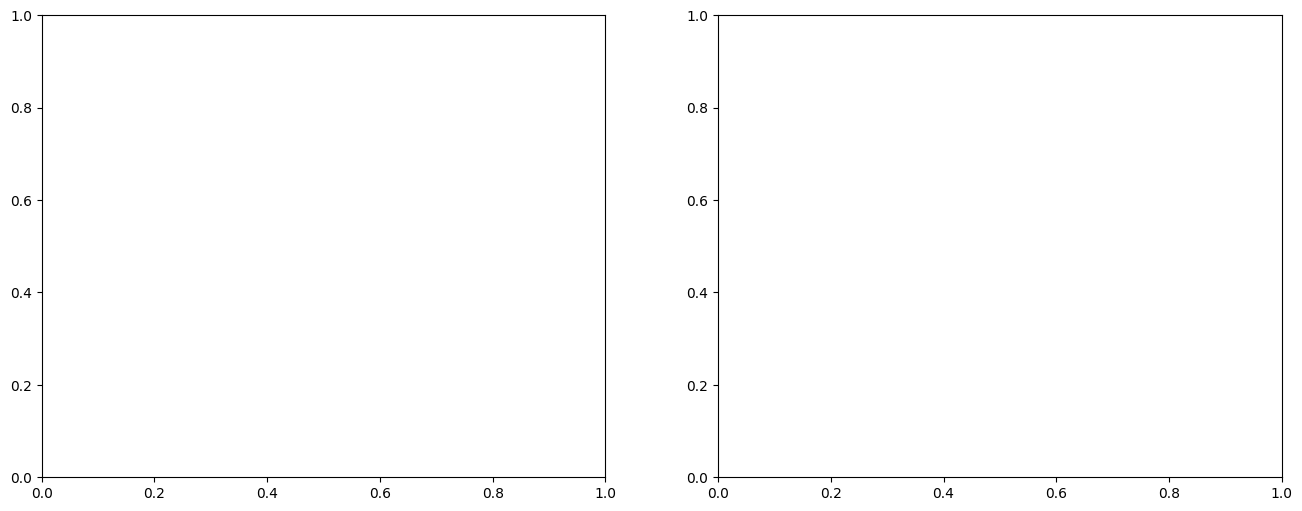

In [35]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

axis1.plot(history.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')
axis1.set_yticks([0.85, 0.9, 0.95, 1.0])
axis1.set_xticks([0, 1.0, 2.0])

axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
axis2.set_yticks([0.20, 0.25, 0.30, 0.35, 0.40])
axis2.set_xticks([0, 1.0, 2.0])
plt.show()

In [24]:
# for review in df1['word']:
#     tokens = word_tokenize(review)

#     tokenized.append(tokens)

In [83]:
len(tokenized)

294576

In [84]:
df['Tokenized_data'] = tokenized

/tmp/ipykernel_34/169671364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenized_data'] = tokenized


In [85]:
df

,Urdu,Preprocessed_Urdu,Tokenized_data
0,ہم نے اک عمر بسر کی ہے غم یار کے ساتھ,ہم نے اک عمر بسر کی ہے غم یار کے ساتھ,"[ہم, نے, اک, عمر, بسر, کی, ہے, غم, یار, کے, ساتھ]"
1,اب تو ہم گھر سے نکلتے ہیں تو رکھ دیتے ہیں,اب تو ہم گھر سے نکلتے ہیں تو رکھ دیتے ہیں,"[اب, تو, ہم, گھر, سے, نکلتے, ہیں, تو, رکھ, دیت..."
2,اس قدر خوف ہے اب شہر کی گلیوں میں کہ لوگ,اس قدر خوف ہے اب شہر کی گلیوں میں کہ لوگ,"[اس, قدر, خوف, ہے, اب, شہر, کی, گلیوں, میں, کہ..."
3,ایک تو خواب لیے پھرتے ہو گلیوں گلیوں,ایک تو خواب لیے پھرتے ہو گلیوں گلیوں,"[ایک, تو, خواب, لیے, پھرتے, ہو, گلیوں, گلیوں]"
4,شہر کا شہر ہی ناصح ہو تو کیا کیجئے گا,شہر کا شہر ہی ناصح ہو تو کیا کیجئے گا,"[شہر, کا, شہر, ہی, ناصح, ہو, تو, کیا, کیجئے, گا]"
...,...,...,...
295621,سہاگن,سہاگن,[سہاگن]
295622,فلم”ریڈ,فلمریڈ,[فلمریڈ]
295623,ویلسن,ویلسن,[ویلسن]
295624,زیٹا,زیٹا,[زیٹا]


In [86]:
df.to_csv('urdu_tokenized.csv', index = False)

In [87]:
start_time = time.time()

model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1)

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')


Time taken : 2.59 mins


In [88]:
model.save("urdu_word2vec.bin")

In [89]:
import os
os.chdir(r'/kaggle/working')

In [90]:
%cd /kaggle/working

/kaggle/working


In [91]:
from IPython.display import FileLink 
FileLink(r'urdu_word2vec.bin')

/kaggle/working/urdu_word2vec.bin

In [ ]:
/kaggle/working/urdu_word2vec_model.bin.wv.vectors.npy

In [92]:
from IPython.display import FileLink 
FileLink(r'urdu_word2vec.bin.wv.vectors.npy')

/kaggle/working/urdu_word2vec.bin.wv.vectors.npy

In [93]:
from IPython.display import FileLink 
FileLink(r'urdu_word2vec.bin.syn1neg.npy')

/kaggle/working/urdu_word2vec.bin.syn1neg.npy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [3]:
word_model = Word2Vec.load('urdu_word2vec.bin')
print(word_model)

Word2Vec<vocab=420227, vector_size=100, alpha=0.025>


In [5]:
len(word_model.wv.vectors)

420227

In [9]:
word_model.wv.key_to_index

{'کے': 0,
 'میں': 1,
 'کی': 2,
 'سے': 3,
 'نے': 4,
 'کا': 5,
 'اور': 6,
 'کو': 7,
 'ہے': 8,
 'پر': 9,
 'کہ': 10,
 'بھی': 11,
 'اس': 12,
 'ہیں': 13,
 'ایک': 14,
 'کیا': 15,
 'پاکستان': 16,
 'کر': 17,
 'ان': 18,
 'ٹیم': 19,
 'نہیں': 20,
 'فلم': 21,
 'لیے': 22,
 'یہ': 23,
 'کرنے': 24,
 'تھا': 25,
 'گیا': 26,
 'بعد': 27,
 'وہ': 28,
 'جس': 29,
 'ساتھ': 30,
 'سی': 31,
 'ہی': 32,
 'کہا': 33,
 'ہوئے': 34,
 'تو': 35,
 'میچ': 36,
 'خان': 37,
 'رنز': 38,
 'تک': 39,
 'کرکٹ': 40,
 'اپنے': 41,
 'رہے': 42,
 'والے': 43,
 'مطابق': 44,
 'سال': 45,
 'جو': 46,
 'ہونے': 47,
 'ہو': 48,
 'پی': 49,
 'جبکہ': 50,
 'جانب': 51,
 'دیا': 52,
 'اپنی': 53,
 'روپے': 54,
 'کہنا': 55,
 'گئی': 56,
 'کرتے': 57,
 'دی': 58,
 'گے': 59,
 'جائے': 60,
 'پہلے': 61,
 'نہ': 62,
 'بی': 63,
 'والی': 64,
 'اب': 65,
 'کیلئے': 66,
 'حاصل': 67,
 'گا': 68,
 'انہوں': 69,
 'ٹیسٹ': 70,
 'جاری': 71,
 'گی': 72,
 'گئے': 73,
 'لیکن': 74,
 'خلاف': 75,
 'سیریز': 76,
 'ٹی': 77,
 'تھی': 78,
 'دو': 79,
 'پاکستانی': 80,
 'سب': 81,
 'جب': 82,
 'انہیں'

In [76]:
df1 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTestfold1.csv')
df1

,',Other
0,ولی‌اللہ,Other
1,',Other
2,پڑھتے,Other
3,ہی,Other
4,دل,Other
...,...,...
289928,ستاروں,Other
289929,نے,Other
289930,شرکت,Other
289931,کی,Other


In [77]:
df1.columns = ['word', 'NER']

In [78]:
df1 = df1.dropna()

In [79]:
df1 = df1[~df1['word'].str.contains('\(')]
df1 = df1[~df1['word'].str.contains('\)')]
# df1 = df1[~df1['word'].str.contains('ControlPanel.{21EC2020-3AEA-1069-A2DD-08002B30309D}')]

In [80]:
df1

,word,NER
0,ولی‌اللہ,Other
1,',Other
2,پڑھتے,Other
3,ہی,Other
4,دل,Other
...,...,...
289927,نامور,Other
289928,ستاروں,Other
289929,نے,Other
289930,شرکت,Other


In [132]:
df1[5:15]

,word,NER
5,بھر,Other
6,آیا,Other
8,محترم,Other
9,مصنف,Other
10,نے,Other
11,یہ,Other
12,مضمون,Other
13,دارالعلوم‌شہابیہ,Organization
14,کے,Other
15,جلیل‌القدر,Other


In [42]:
max_word_length = df1['word'].apply(lambda x: len(x)).max()

print("Maximum length of word:", max_word_length)

Maximum length of word: 50


In [54]:
max_length_words = df1[df1['word'].apply(lambda x: len(x)) == max_word_length]['word']

max_length_words_list = max_length_words.tolist()

print("Word(s) with maximum length:", max_length_words)

Word(s) with maximum length: 45842    سینٹرفاردی‌سٹڈی‌آف‌دی‌مڈل‌ایسٹ‌اینڈمسلم‌سولائز...
Name: word, dtype: object


In [44]:
max_length_words_indices = df1[df1['word'].apply(lambda x: len(x)) == max_word_length].index

print(max_length_words_indices)

Index([45842], dtype='int64')


In [53]:
df1['word'][43342:43390]

45822                                                   نے
45823                                                اسلام
45824                                                  اور
45825                                               مسلمان
45826                                                   کے
45827                                                متعلق
45828                                               اسپنسر
45829                                                   کے
45830                                               نظریات
45831                                                   کو
45832                                                چیلنج
45833                                                  کیا
45834                                                   ہے
45836                                              پروفیسر
45837                                                 کارل
45838                                                ارنسٹ
45839                                            یونیورس

In [18]:
df1['NER'].value_counts()

NER
Other           251310
Location          9899
Person            9545
Organization      4977
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X , y = df1['word'], df1['NER']

In [20]:
X

0         ولی‌اللہ
1                '
2            پڑھتے
3               ہی
4               دل
            ...   
289927       نامور
289928      ستاروں
289929          نے
289930        شرکت
289931          کی
Name: word, Length: 275731, dtype: object

In [186]:
def vectorize_data(data, vocab: dict) -> list:
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    return vectorized

In [58]:
from keras.preprocessing.sequence import pad_sequences
input_length = 50
X_pad = pad_sequences(
    sequences=vectorize_data(X, vocab=word_model.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')


Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [104]:
X_pad

array([[  1809, 294123, 294432, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       [294517, 294111, 294726, ...,      0,      0,      0],
       ...,
       [294506, 160622,      0, ...,      0,      0,      0],
       [294303, 158145, 153586, ...,      0,      0,      0],
       [153586, 294432,      0, ...,      0,      0,      0]], dtype=int32)

In [156]:
y = pd.get_dummies(df1['NER'])
y

,Location,Organization,Other,Person
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
289927,False,False,True,False
289928,False,False,True,False
289929,False,False,True,False
289930,False,False,True,False


In [157]:
label2idx = {label: idx for idx, label in enumerate(y.columns)}
label2idx

{'Location': 0, 'Organization': 1, 'Other': 2, 'Person': 3}

In [172]:
idx2label = {0: 'Location', 1:  'Organization', 2:'Other', 3:'Person'}

In [82]:
y = y.astype(int)

In [83]:
y = y.values.tolist()

In [102]:
y = np.array(y)

In [103]:
y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42)

In [106]:
print('training size :', X_train.shape[0])

training size : 220584


In [107]:
print('testing size :',X_test.shape[0])

testing size : 55147


In [108]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [109]:
def build_model(embedding_matrix: np.ndarray, input_length: int):
    model = Sequential()
    model.add(Embedding(
        input_dim = embedding_matrix.shape[0],
        output_dim = embedding_matrix.shape[1], 
        input_length = input_length,
        weights = [embedding_matrix],
        trainable=False))
    model.add(Bidirectional(LSTM(128, recurrent_dropout=0.1)))
    model.add(Dropout(0.25))
    model.add(Dense(64))
    model.add(Dropout(0.3))
    model.add(Dense(4, activation='softmax'))
    model.summary()
    return model

model = build_model(
    embedding_matrix=word_model.wv.vectors,
    input_length=input_length)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           42022700  
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                      

In [112]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=3)

Epoch 1/3
1724/1724 [==============================] - 396s 229ms/step - loss: 0.3496 - accuracy: 0.9124 - val_loss: 0.3250 - val_accuracy: 0.9175
Epoch 2/3
1724/1724 [==============================] - 402s 233ms/step - loss: 0.3220 - accuracy: 0.9161 - val_loss: 0.3006 - val_accuracy: 0.9201
Epoch 3/3
1724/1724 [==============================] - 404s 234ms/step - loss: 0.3050 - accuracy: 0.9179 - val_loss: 0.2853 - val_accuracy: 0.9210


In [113]:
model.save('urdu_ner_model.h5')

/Users/zeeshan/Multilingual-Sentiment-Analysis/venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


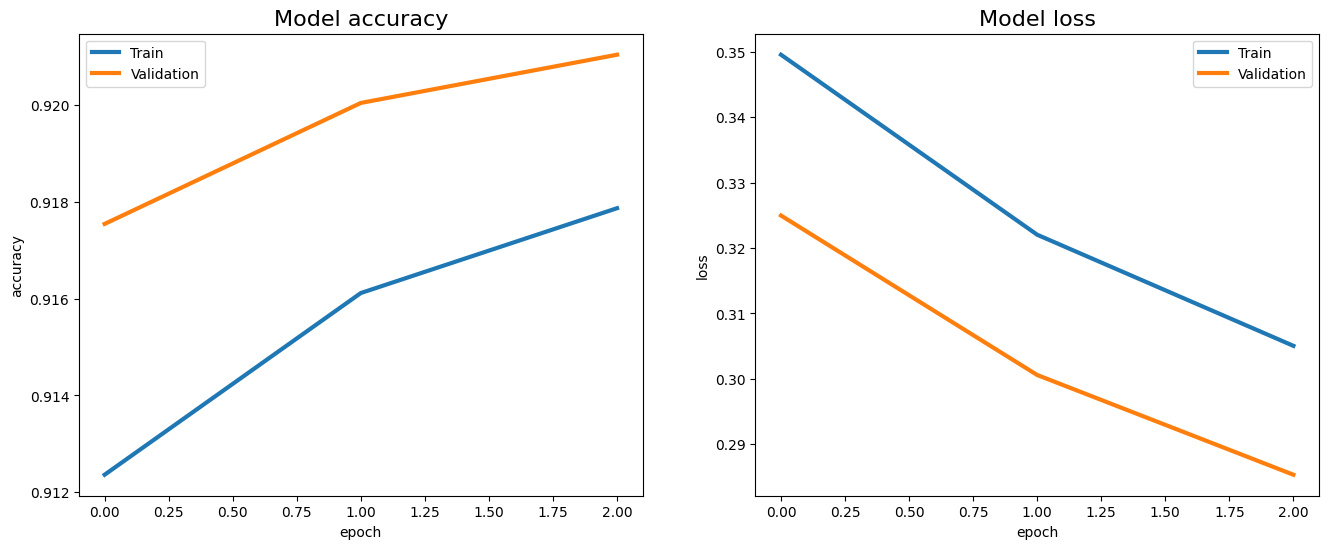

In [115]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

axis1.plot(history.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')

axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
plt.show()

In [116]:
from keras.models import load_model

model = load_model('urdu_ner_model.h5')

In [117]:
model.evaluate(X_test, y_test)

1724/1724 [==============================] - 34s 20ms/step - loss: 0.2853 - accuracy: 0.9210


[0.2853175103664398, 0.9210473895072937]

In [118]:
model.predict(X_test)

1724/1724 [==============================] - 35s 20ms/step


array([[1.1665586e-02, 2.8062351e-02, 8.9169079e-01, 6.8581223e-02],
       [1.4640845e-03, 3.7226921e-03, 9.9216664e-01, 2.6466518e-03],
       [1.1530726e-02, 3.8986485e-02, 9.2198050e-01, 2.7502332e-02],
       ...,
       [3.8600728e-02, 1.7680550e-01, 6.4466840e-01, 1.3992529e-01],
       [4.6290816e-03, 3.0491045e-03, 9.8524958e-01, 7.0722420e-03],
       [3.9791557e-04, 3.0347728e-04, 9.9871492e-01, 5.8368075e-04]],
      dtype=float32)

In [124]:
X_test.shape

(55147, 50)

In [125]:
X_test[0].reshape(1,50)

array([[301948,  16189, 294456, 292494, 294432,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0]], dtype=int32)

In [126]:
model.predict(X_test[0].reshape(1,50))

1/1 [==============================] - 0s 56ms/step


array([[0.01166558, 0.02806234, 0.8916909 , 0.06858118]], dtype=float32)

In [127]:
y_test[0]

array([0, 0, 1, 0])

In [141]:
text = 'میں لاہور گیا۔'
vectorize_data(text, vocab=word_model.wv.key_to_index)

Vectorize sentences... (done)


[[294440],
 [294432],
 [294475],
 [],
 [294123],
 [16189],
 [294456],
 [1809],
 [158145],
 [],
 [292520],
 [294432],
 [16189],
 []]

In [142]:
from nltk.tokenize import word_tokenize
token = word_tokenize(text)

In [143]:
token

['میں', 'لاہور', 'گیا۔']

In [144]:
token[0]

'میں'

In [152]:

pad = pad_sequences(
        sequences=vectorize_data(token, vocab=word_model.wv.key_to_index),
        maxlen=50,
        padding='post')
output = model.predict(pad)

Vectorize sentences... (done)
1/1 [==============================] - 0s 85ms/step


array([[0.00099603, 0.00216932, 0.9949831 , 0.00185154],
       [0.9031812 , 0.02066056, 0.06188669, 0.01427155],
       [0.00126547, 0.00108961, 0.99298805, 0.00465691]], dtype=float32)

In [178]:
idx2label[2]

'Other'

In [187]:
def out(text):
    token = word_tokenize(text)
    pad = pad_sequences(
        sequences=vectorize_data(token, vocab=word_model.wv.key_to_index),
        maxlen=50,
        padding='post')
    output = model.predict(pad)
    output = np.argmax(output, axis=1)
    prediction = [int(val) for val in output]
    pred_tag_list = [idx2label[tag_id] for tag_id in prediction]
    return pred_tag_list

In [188]:
out('میں لاہور گیا۔')

1/1 [==============================] - 0s 22ms/step


['Other', 'Location', 'Other']

In [195]:
m = word_model.wv['میں']

In [196]:
l = word_model.wv['لاہور']

In [198]:
m.shape

(100,)

In [199]:
l.shape

(100,)

In [203]:
m.reshape(-1,1)

array([[-2.9013405 ],
       [ 1.6683584 ],
       [-4.581881  ],
       [-0.92915624],
       [ 0.0391181 ],
       [ 0.8056536 ],
       [ 1.1268903 ],
       [-2.1282136 ],
       [ 2.0302255 ],
       [ 0.60519075],
       [-0.38638976],
       [ 2.823042  ],
       [ 1.0502768 ],
       [ 0.26466691],
       [ 2.5222466 ],
       [ 1.9139465 ],
       [ 2.8222187 ],
       [-0.14816365],
       [-2.7729523 ],
       [ 1.8392746 ],
       [-0.81892383],
       [ 0.79941314],
       [ 1.9675037 ],
       [ 2.616245  ],
       [-0.7154365 ],
       [ 1.7364402 ],
       [ 1.0474082 ],
       [-1.0071133 ],
       [ 2.1922953 ],
       [ 1.1093198 ],
       [ 0.49897948],
       [ 0.24998188],
       [-1.1466202 ],
       [ 0.24503006],
       [-1.6902158 ],
       [ 3.104987  ],
       [ 1.0643985 ],
       [ 2.153898  ],
       [-0.93275535],
       [ 1.9594215 ],
       [ 0.22049145],
       [ 1.8047704 ],
       [-3.0676453 ],
       [ 3.9287922 ],
       [-1.5444264 ],
       [ 0

In [205]:
from scipy import spatial

result = 1 - spatial.distance.cosine(m, l)

In [206]:
result

0.2702489197254181

In [ ]:
اسلامآباد

In [216]:
i = word_model.wv['اسلامآباد']

KeyError: "Key 'اسلامآباد' not present"

In [213]:
i = word_model.wv['اسلام']

In [214]:
a, i

(array([-0.11145704,  0.34485906,  0.03551174, -0.3591348 , -0.19528708,
        -0.2348207 ,  0.03878949, -0.05635993,  0.00238316, -0.0101448 ,
        -0.11614872, -0.17762844,  0.23393917,  0.31886953,  0.16330346,
         0.01320056, -0.05598634,  0.09590252,  0.03733552, -0.04688718,
         0.1719221 ,  0.07305378,  0.28757504,  0.1465962 ,  0.04710625,
         0.06369305,  0.01413541,  0.5784702 , -0.06684899,  0.17073451,
         0.33714217, -0.01706034, -0.1297601 , -0.02651066,  0.27854005,
         0.03283951, -0.05632118, -0.03489365, -0.37713102, -0.2435967 ,
        -0.11110364,  0.16417293, -0.44008458,  0.2535909 ,  0.1864347 ,
         0.05590888,  0.02240089, -0.09385835,  0.09078053,  0.12179966,
        -0.05450856, -0.2017015 , -0.08592911,  0.06793347,  0.15756106,
        -0.05687596, -0.06767158,  0.01570957, -0.16231698, -0.2884161 ,
        -0.2209649 , -0.06113847, -0.06028497, -0.11539943, -0.05590188,
         0.08384541,  0.37611812,  0.14734691, -0.0

/Users/zeeshan/Multilingual-Sentiment-Analysis/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zeeshan/Multilingual-Sentiment-Analysis/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


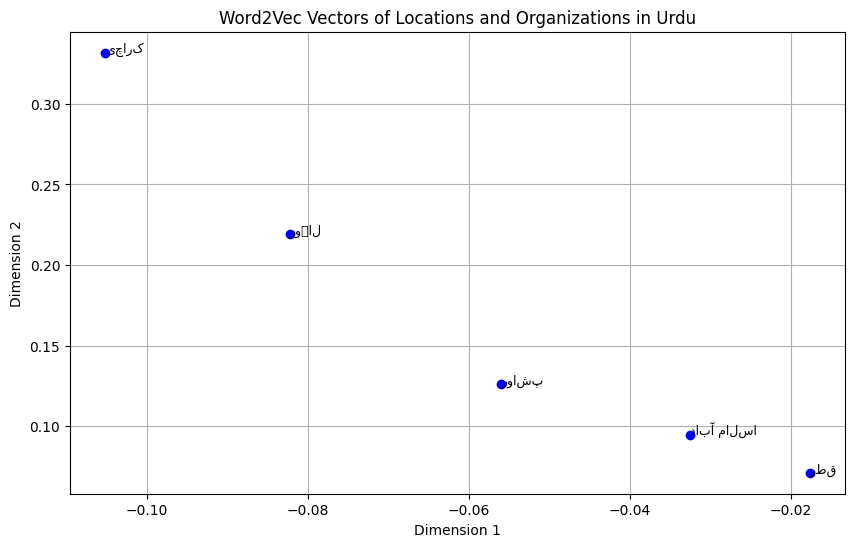

In [13]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

word_model = Word2Vec.load('urdu_headline_word2vec.bin')

locations_urdu = ["کراچی", "لاہور", "اسلام آباد", "پشاور", "قطر", "دبئی"]
organizations_urdu = ["پاکستان انٹرنیشنل ائیر لائن", "پاک فوج", "تحریک انصاف", "جیو نیوز", "آئی بی ایم"]

location_vectors = [word_model.wv[loc] for loc in locations_urdu if loc in word_model.wv]
organization_vectors = [word_model.wv[org] for org in organizations_urdu if org in word_model.wv]

plt.figure(figsize=(10, 6))
for vec, label in zip(location_vectors, locations_urdu):
    plt.scatter(vec[0], vec[1], marker='o', color='blue')
    plt.text(vec[0], vec[1], label[::-1], fontsize=9)

for vec, label in zip(organization_vectors, organizations_urdu):
    plt.scatter(vec[0], vec[1], marker='x', color='red')
    plt.text(vec[0], vec[1], label, fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word2Vec Vectors of Locations and Organizations in Urdu')
plt.grid(True)
plt.show()


In [20]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Load the Word2Vec model
word_model = Word2Vec.load('urdu_word2vec.bin')

# Define lists of locations and organizations (replace with your data)
locations_urdu = ["کراچی", "لاہور", "اسلام آباد", "پشاور", "قطر", "دبئی"]
organizations_urdu = ["پاکستان", "انٹرنیشنل", "ائیر","لائن", "پاک","فوج", "تحریک انصاف", "جیو نیوز", "آئی بی ایم"]

# Function to calculate cosine similarity
def calculate_similarity(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

# Calculate similarity between locations and location-organization pairs
for loc in locations_urdu:
    loc_vec = word_model.wv[loc]
    print(f"Location: {loc}")
    for org in organizations_urdu:
        org_vec = word_model.wv[org]
        similarity = calculate_similarity(loc_vec, org_vec)
        print(f"Similarity between {loc} and {org}: {similarity}")


Location: کراچی
Similarity between کراچی and پاکستان: 0.5076690912246704
Similarity between کراچی and انٹرنیشنل: 0.304513156414032
Similarity between کراچی and ائیر: 0.256496399641037
Similarity between کراچی and لائن: 0.08992017060518265
Similarity between کراچی and پاک: 0.11573149263858795
Similarity between کراچی and فوج: 0.13477399945259094


KeyError: "Key 'تحریک انصاف' not present"